In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
#Loading the  dataset
data=pd.read_csv('1.1ML_Exploration_Dataset.csv')

In [65]:
data.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [23]:
data.shape

(100, 62)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

#There are object integer and float datatypes

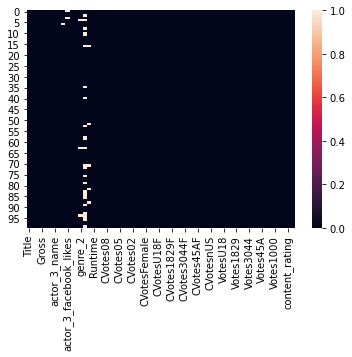

In [25]:
sns.heatmap(data.isnull())

#There are null values present

In [66]:
data.columns[data.isnull().any()]

Index(['actor_2_facebook_likes', 'actor_3_facebook_likes', 'genre_2',
       'genre_3', 'MetaCritic'],
      dtype='object')

In [67]:
#fill na values of non numeric values with mode
for col in['genre_2','genre_3']:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [68]:
#filling na values of numeric columns with median 
data["actor_2_facebook_likes"]=data["actor_2_facebook_likes"].fillna(data["actor_2_facebook_likes"].median())
data["actor_3_facebook_likes"]=data["actor_3_facebook_likes"].fillna(data["actor_3_facebook_likes"].median())
data["MetaCritic"]=data["MetaCritic"].fillna(data["MetaCritic"].median())

In [69]:
data.isnull().values.any()

False

# SUBTASK 1

In [30]:
#converting the unit of budget and gross columns from $ to  million$
data['budget millions$']=data.apply(lambda row: (round(row['budget']/1000000,2)),axis=1)
data['gross millions$']=data.apply(lambda row: (round(row['Gross']/1000000,2)),axis=1)

In [31]:
data.drop('budget',axis=1,inplace=True)
data.drop('Gross',axis=1,inplace=True)
data.head()

,Title,title_year,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,budget millions$,gross millions$
0,La La Land,2016,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,626.5,8.2,Comedy,...,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,30.0,151.10
1,Zootopia,2016,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,...,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,150.0,341.27
2,Lion,2016,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,...,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,12.0,51.74
3,Arrival,2016,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,626.5,8.0,Drama,...,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,47.0,100.55
4,Manchester by the Sea,2016,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,...,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,9.0,47.70


# SUBTASK 2

In [32]:
#adding a new column profit with values=difference between gross and budget
data['profit']=data['gross millions$']-data['budget millions$']
data.head()

,Title,title_year,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,budget millions$,gross millions$,profit
0,La La Land,2016,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,626.5,8.2,Comedy,...,7.6,7.5,7.1,8.3,8.1,PG-13,USA,30.0,151.10,121.10
1,Zootopia,2016,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,...,7.8,8.1,7.6,8.0,8.0,PG,USA,150.0,341.27,191.27
2,Lion,2016,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,...,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,12.0,51.74,39.74
3,Arrival,2016,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,626.5,8.0,Drama,...,7.6,7.7,7.3,8.0,7.9,PG-13,USA,47.0,100.55,53.55
4,Manchester by the Sea,2016,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,...,7.6,7.6,7.1,7.9,7.8,R,USA,9.0,47.70,38.70


In [33]:
#saving a new dataframe with top10 profitable movies
top10=data.nlargest(10,['profit'])
top10

,Title,title_year,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,budget millions$,gross millions$,profit
97,Star Wars: Episode VII - The Force Awakens,2015,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,...,7.8,8.2,7.7,8.2,7.9,PG-13,USA,245.0,936.66,691.66
11,The Avengers,2012,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,...,7.9,8.1,7.4,8.3,7.9,PG-13,USA,220.0,623.28,403.28
47,Deadpool,2016,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,...,7.8,7.9,7.3,8.1,7.9,R,USA,58.0,363.02,305.02
32,The Hunger Games: Catching Fire,2013,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,...,7.2,7.9,6.7,7.7,7.4,PG-13,USA,130.0,424.65,294.65
12,Toy Story 3,2010,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,...,8.1,8.1,8.1,8.5,8.3,G,USA,200.0,414.98,214.98
8,The Dark Knight Rises,2012,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,8.4,Action,...,7.9,7.9,7.8,8.4,8.4,PG-13,USA,250.0,448.13,198.13
45,The Lego Movie,2014,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,7.8,Animation,...,7.4,7.4,7.2,8.0,7.6,PG,Australia,60.0,257.76,197.76
1,Zootopia,2016,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,...,7.8,8.1,7.6,8.0,8.0,PG,USA,150.0,341.27,191.27
41,Despicable Me,2010,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,7.7,Animation,...,7.5,7.9,7.0,7.6,7.6,PG,USA,69.0,251.50,182.50
18,Inside Out,2015,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,8.2,Animation,...,7.9,7.9,7.6,8.2,8.1,PG,USA,175.0,356.45,181.45


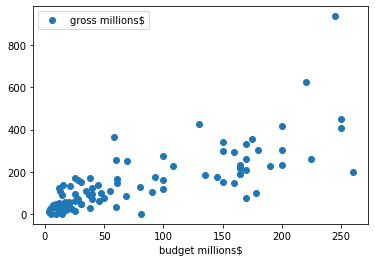

In [34]:
#scatter plot between gross and budget
data.plot(x='budget millions$',y='gross millions$',style='o')

In [35]:
#extracting movies having loss
neg_profit=data.sort_values(by=['profit'])
neg_profit.head(11)

,Title,title_year,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,budget millions$,gross millions$,profit
22,Hugo,2011,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,7.5,Adventure,...,7.5,7.6,7.4,7.7,7.5,PG,USA,170.0,73.82,-96.18
39,The Little Prince,2015,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,7.8,Animation,...,7.4,7.9,6.6,7.7,7.7,PG,France,81.2,1.34,-79.86
17,Edge of Tomorrow,2014,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,7.9,Action,...,7.8,7.8,7.5,8.0,7.8,PG-13,USA,178.0,100.19,-77.81
7,Tangled,2010,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,7.8,Animation,...,7.6,7.9,6.9,7.9,7.7,PG,USA,260.0,200.81,-59.19
46,Scott Pilgrim vs. the World,2010,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,7.5,Action,...,7.1,7.0,6.6,7.8,7.4,PG-13,USA,60.0,31.49,-28.51
28,X-Men: First Class,2011,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,7.8,Action,...,7.5,7.7,7.3,7.8,7.7,PG-13,USA,160.0,146.41,-13.59
82,Flipped,2010,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,7.7,Comedy,...,7.3,7.6,6.4,7.5,7.7,PG,USA,14.0,1.75,-12.25
66,Warrior,2011,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,8.2,Action,...,7.7,7.5,7.1,8.2,8.1,PG-13,USA,25.0,13.65,-11.35
56,Rush,2013,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,8.1,Action,...,7.8,7.8,7.1,7.9,8.1,R,UK,38.0,26.90,-11.10
89,Amour,2012,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,7.9,Drama,...,7.8,8.1,7.2,7.9,7.8,PG-13,France,8.9,0.23,-8.67


# SUBTASK 3

In [38]:
#adding a new column likes_sum, with values=sum of likes of actor 1,2 and 3
data['likes_sum']=data['actor_1_facebook_likes']+data['actor_2_facebook_likes']+data['actor_3_facebook_likes']
data.head(3)

,Title,title_year,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,budget millions$,gross millions$,profit,likes_sum
0,La La Land,2016,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,626.5,8.2,Comedy,...,7.5,7.1,8.3,8.1,PG-13,USA,30.0,151.10,121.10,33626.5
1,Zootopia,2016,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,...,8.1,7.6,8.0,8.0,PG,USA,150.0,341.27,191.27,57800.0
2,Lion,2016,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,...,8.4,7.1,8.1,8.0,PG-13,Australia,12.0,51.74,39.74,138800.0


In [39]:
#top 5 trio combo with most likes
d1=data.nlargest(5,['likes_sum'])
trio=d1.iloc[:,2:5]
trio

,actor_1_name,actor_2_name,actor_3_name
2,Dev Patel,Nicole Kidman,Rooney Mara
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman
4,Casey Affleck,Michelle Williams,Kyle Chandler
8,Tom Hardy,Christian Bale,Joseph Gordon-Levitt


# SUBTASK 4

In [123]:
#creating new dataframe df with genre,cvotes and votes column
df=data.filter(["genre_1","genre_2","genre_3","CVotes10","CVotes09","CVotes08","CVotes07","CVotes06","CVotes05","CVotes04","CVotes03","CVotes02","CVotes01","CVotesMale","CVotesFemale","CVotesU18","CVotesU18M","CVotesU18F","CVotes1829","CVotes1829M","CVotes1829F","CVotes3044","CVotes3044M","CVotes3044F","CVotes45A","CVotes45AM","CVotes45AF","CVotes1000","CVotesUS","CVotesnUS","VotesM","VotesF","VotesU18","VotesU18M","VotesU18F","Votes1829","Votes1829M","Votes1829F","Votes3044","Votes3044M","Votes3044F","Votes45A","Votes45AM","Votes45AF","Votes1000","VotesUS","VotesnUS"])
#adding a new column cnt and setting its value as 1
df["cnt"]="1"
df

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Comedy,Drama,Music,74245,71191,64640,38831,17377,8044,3998,...,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,1
1,Animation,Adventure,Comedy,53626,70912,102352,57261,16719,4539,1467,...,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,1
2,Biography,Drama,Sci-Fi,23325,29830,40564,20296,5842,1669,558,...,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,1
3,Drama,Mystery,Sci-Fi,55533,87850,109536,65440,26913,10556,5057,...,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,1
4,Drama,Drama,Sci-Fi,18191,33532,46596,29626,11879,4539,1976,...,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Drama,Music,Sci-Fi,110404,161864,132656,56007,16577,6031,2937,...,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,1
96,Drama,Romance,Sci-Fi,16953,22109,31439,19251,8142,3412,1649,...,7.8,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,1
97,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,1
98,Adventure,Family,Fantasy,68937,54947,102488,80465,31205,11792,4808,...,7.4,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,1


In [124]:
df['g1sum']=df.iloc[:,3:].sum(axis=1)
df['g2sum']=df.iloc[:,3:].sum(axis=1)
df['g3sum']=df.iloc[:,3:].sum(axis=1)

In [125]:
#creating df_by_g1 dataframe
df_by_g1=df.filter(["genre_1","g1sum"])
df_by_g1

,genre_1,g1sum
0,Comedy,1049054.7
1,Animation,1114499.4
2,Biography,457726.7
3,Drama,1385983.5
4,Drama,567471.3
...,...,...
95,Drama,1844012.9
96,Drama,444633.7
97,Action,2412591.4
98,Adventure,1487924.8


In [126]:
#creating df_by_g2 dataframe
df_by_g2=df.filter(["genre_2","g2sum"])
df_by_g2

,genre_2,g2sum
0,Drama,2098109.4
1,Adventure,2228998.8
2,Drama,915453.4
3,Mystery,2771967.0
4,Drama,1134942.6
...,...,...
95,Music,3688025.8
96,Romance,889267.4
97,Adventure,4825182.8
98,Family,2975849.6


In [127]:
#creating df_by_g3 dataframe
df_by_g3=df.filter(["genre_3","g3sum"])
df_by_g3

,genre_3,g3sum
0,Music,4196218.8
1,Comedy,4457997.6
2,Sci-Fi,1830906.8
3,Sci-Fi,5543934.0
4,Sci-Fi,2269885.2
...,...,...
95,Sci-Fi,7376051.6
96,Sci-Fi,1778534.8
97,Fantasy,9650365.6
98,Fantasy,5951699.2


In [128]:
#combining 3 datasets by genre name
df_add=df_by_g1.merge(df_by_g2,left_on='genre_1',right_on='genre_2').merge(df_by_g3,left_on='genre_1',right_on='genre_3').drop(columns=['genre_2','genre_3']).rename(columns={'genre_1':'genre'})
df_add

,genre,g1sum,g2sum,g3sum
0,Comedy,1049054.7,6555517.2,4457997.6
1,Comedy,1049054.7,6555517.2,5126687.6
2,Comedy,1049054.7,6555517.2,9541389.2
3,Comedy,1049054.7,6555517.2,6306613.2
4,Comedy,1049054.7,6555517.2,4647379.6
...,...,...,...,...
9717,Mystery,3447459.3,2771967.0,6888656.4
9718,Mystery,3447459.3,2722459.8,8088595.6
9719,Mystery,3447459.3,2722459.8,5896218.8
9720,Mystery,3447459.3,2722459.8,9843384.8


In [129]:
#adding g1sum,g2sum and g3sum rows into a single column called count
df_add['count']=df_add['g1sum']+df_add['g2sum']+df_add['g3sum']
df_add.drop('g1sum',axis=1,inplace=True)
df_add.drop('g2sum',axis=1,inplace=True)
df_add.drop('g3sum',axis=1,inplace=True)

In [130]:
df_add.groupby('genre')['count'].sum()
df_add

,genre,count
0,Comedy,12062569.5
1,Comedy,12731259.5
2,Comedy,17145961.1
3,Comedy,13911185.1
4,Comedy,12251951.5
...,...,...
9717,Mystery,13108082.7
9718,Mystery,14258514.7
9719,Mystery,12066137.9
9720,Mystery,16013303.9


In [131]:
#top10 genre movies based on count
genre_top10=df_add.nlargest(10,['count'])
genre_top10

,genre,count
8979,Adventure,24758069.6
8803,Adventure,23508707.4
9155,Adventure,22969968.7
9331,Adventure,22956257.2
8715,Adventure,22877836.7
9067,Adventure,22744625.2
9683,Adventure,22361272.2
9419,Adventure,22136468.4
8891,Adventure,21986563.2
9243,Adventure,21984350.4
